# Neural Network Classification With PyTorch

Classification is a proble of predicting whether something is one thing or another (there can be multiple things as the optins)

* Learnpytorch.io: https://www.learnpytorch.io/02_pytorch_classification/
* PyTorch Doc: https://pytorch.org/docs/stable/index.html
* Github Code: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb
* Stuck: Go to the github discussion tab.

## 1. Make Classification data and get it ready

In [1]:
# Scikit-learn for data
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                    noise = 0.04,
                    random_state = 42)

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"Print first 5 sample of X: \n{X[:5]}")
print(f"Print first 5 sample of y: \n{y[:5]}")
print(f"Type of X: {type(X)}")
print(f"Type of y: {type(y)}")

Print first 5 sample of X: 
[[ 0.74822656  0.23908325]
 [-0.74509559  0.16097526]
 [-0.82262532  0.19762051]
 [-0.41143316  0.68255648]
 [ 0.44390494 -0.89582949]]
Print first 5 sample of y: 
[1 1 1 1 0]
Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


## Make DataFrame of circle data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label":y})
circles.head()

,X1,X2,label
0,0.748227,0.239083,1
1,-0.745096,0.160975,1
2,-0.822625,0.197621,1
3,-0.411433,0.682556,1
4,0.443905,-0.895829,0


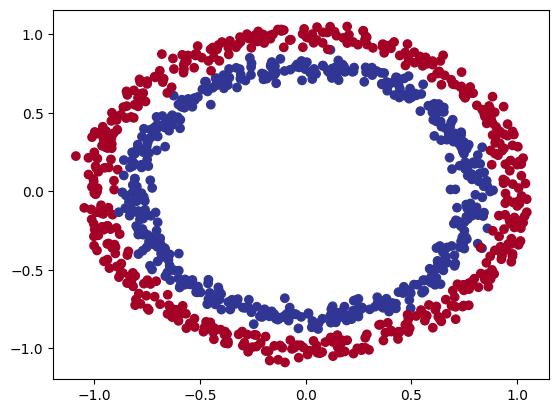

In [5]:
# Visualize, visualize and Visualize
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0], y = X[:,1], c = y, cmap = plt.cm.RdYlBu) # cmap = colormap

Note: the data we'are working with is often referred to as a toyt dataset, a dataset taht is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of x: {X_sample}")
print(f"Shape for one sample of x: {X_sample.shape}")
print(f"Values for one sample of y: {y_sample}")
print(f"Shape for one sample of y: {y_sample.shape}")

Values for one sample of x: [0.74822656 0.23908325]
Shape for one sample of x: (2,)
Values for one sample of y: 1
Shape for one sample of y: ()


### 1.2 Turn data into tensors and create train and test splits

In [8]:
import torch
torch.__version__

'2.4.0+cu121'

In [9]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # torch.float for float 32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7482,  0.2391],
         [-0.7451,  0.1610],
         [-0.8226,  0.1976],
         [-0.4114,  0.6826],
         [ 0.4439, -0.8958]]),
 tensor([1., 1., 1., 1., 0.]))

### 1.3 Split data into train-test-split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=32,
                                                    stratify = y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one.
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [11]:
# Import PyTorch and nn
import torch
from torch import nn

In [12]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1.sublcasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create `nn.Linear()` layers that are capable of handling that shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation)
4. Instantiate an instance of our model class and sent it to the target device

In [13]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [14]:
# 1. Constract a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear Layer capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # first layer: takes in 2 features and outputs 5 featues
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # second layer or final layer: takes in 5 features and outputs 1 feature
  # 3. Define a forward() method that outliens the forward pass
  def forward(self, x):
    return self.layer_2(self.layer1(x)) # x -> layer_1 -> layer_2

# 4. Instantia an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5553, -0.6983],
                      [ 0.3792, -0.2939],
                      [-0.6733,  0.4641],
                      [ 0.4570,  0.0669],
                      [ 0.5949,  0.2719]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.1094,  0.4965,  0.0407,  0.0382,  0.1439], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.3498, -0.0355,  0.2439,  0.2242, -0.0094]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.1394], device='cuda:0'))])

Tensorflow Plyaground: https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5,2&seed=0.43454&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

Video: 9:38